In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

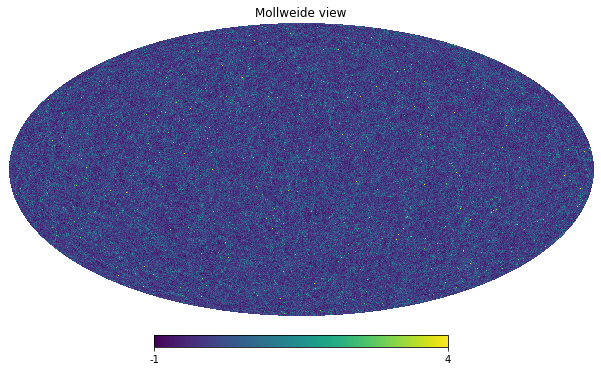

In [3]:
overdensity2048 = hp.read_map("MAPS/overdensity_NS_2048_R_1024_P_1024_DV_1.fits")
overdensity1024 = hp.read_map("MAPS/overdensity_NS_1024_R_1024_P_1024_DV_1.fits")
hp.mollview(overdensity2048,xsize=6400, max=4)

In [4]:
psOver2048 = hp.sphtfunc.anafast(overdensity2048)
psOver1024 = hp.sphtfunc.anafast(overdensity1024)

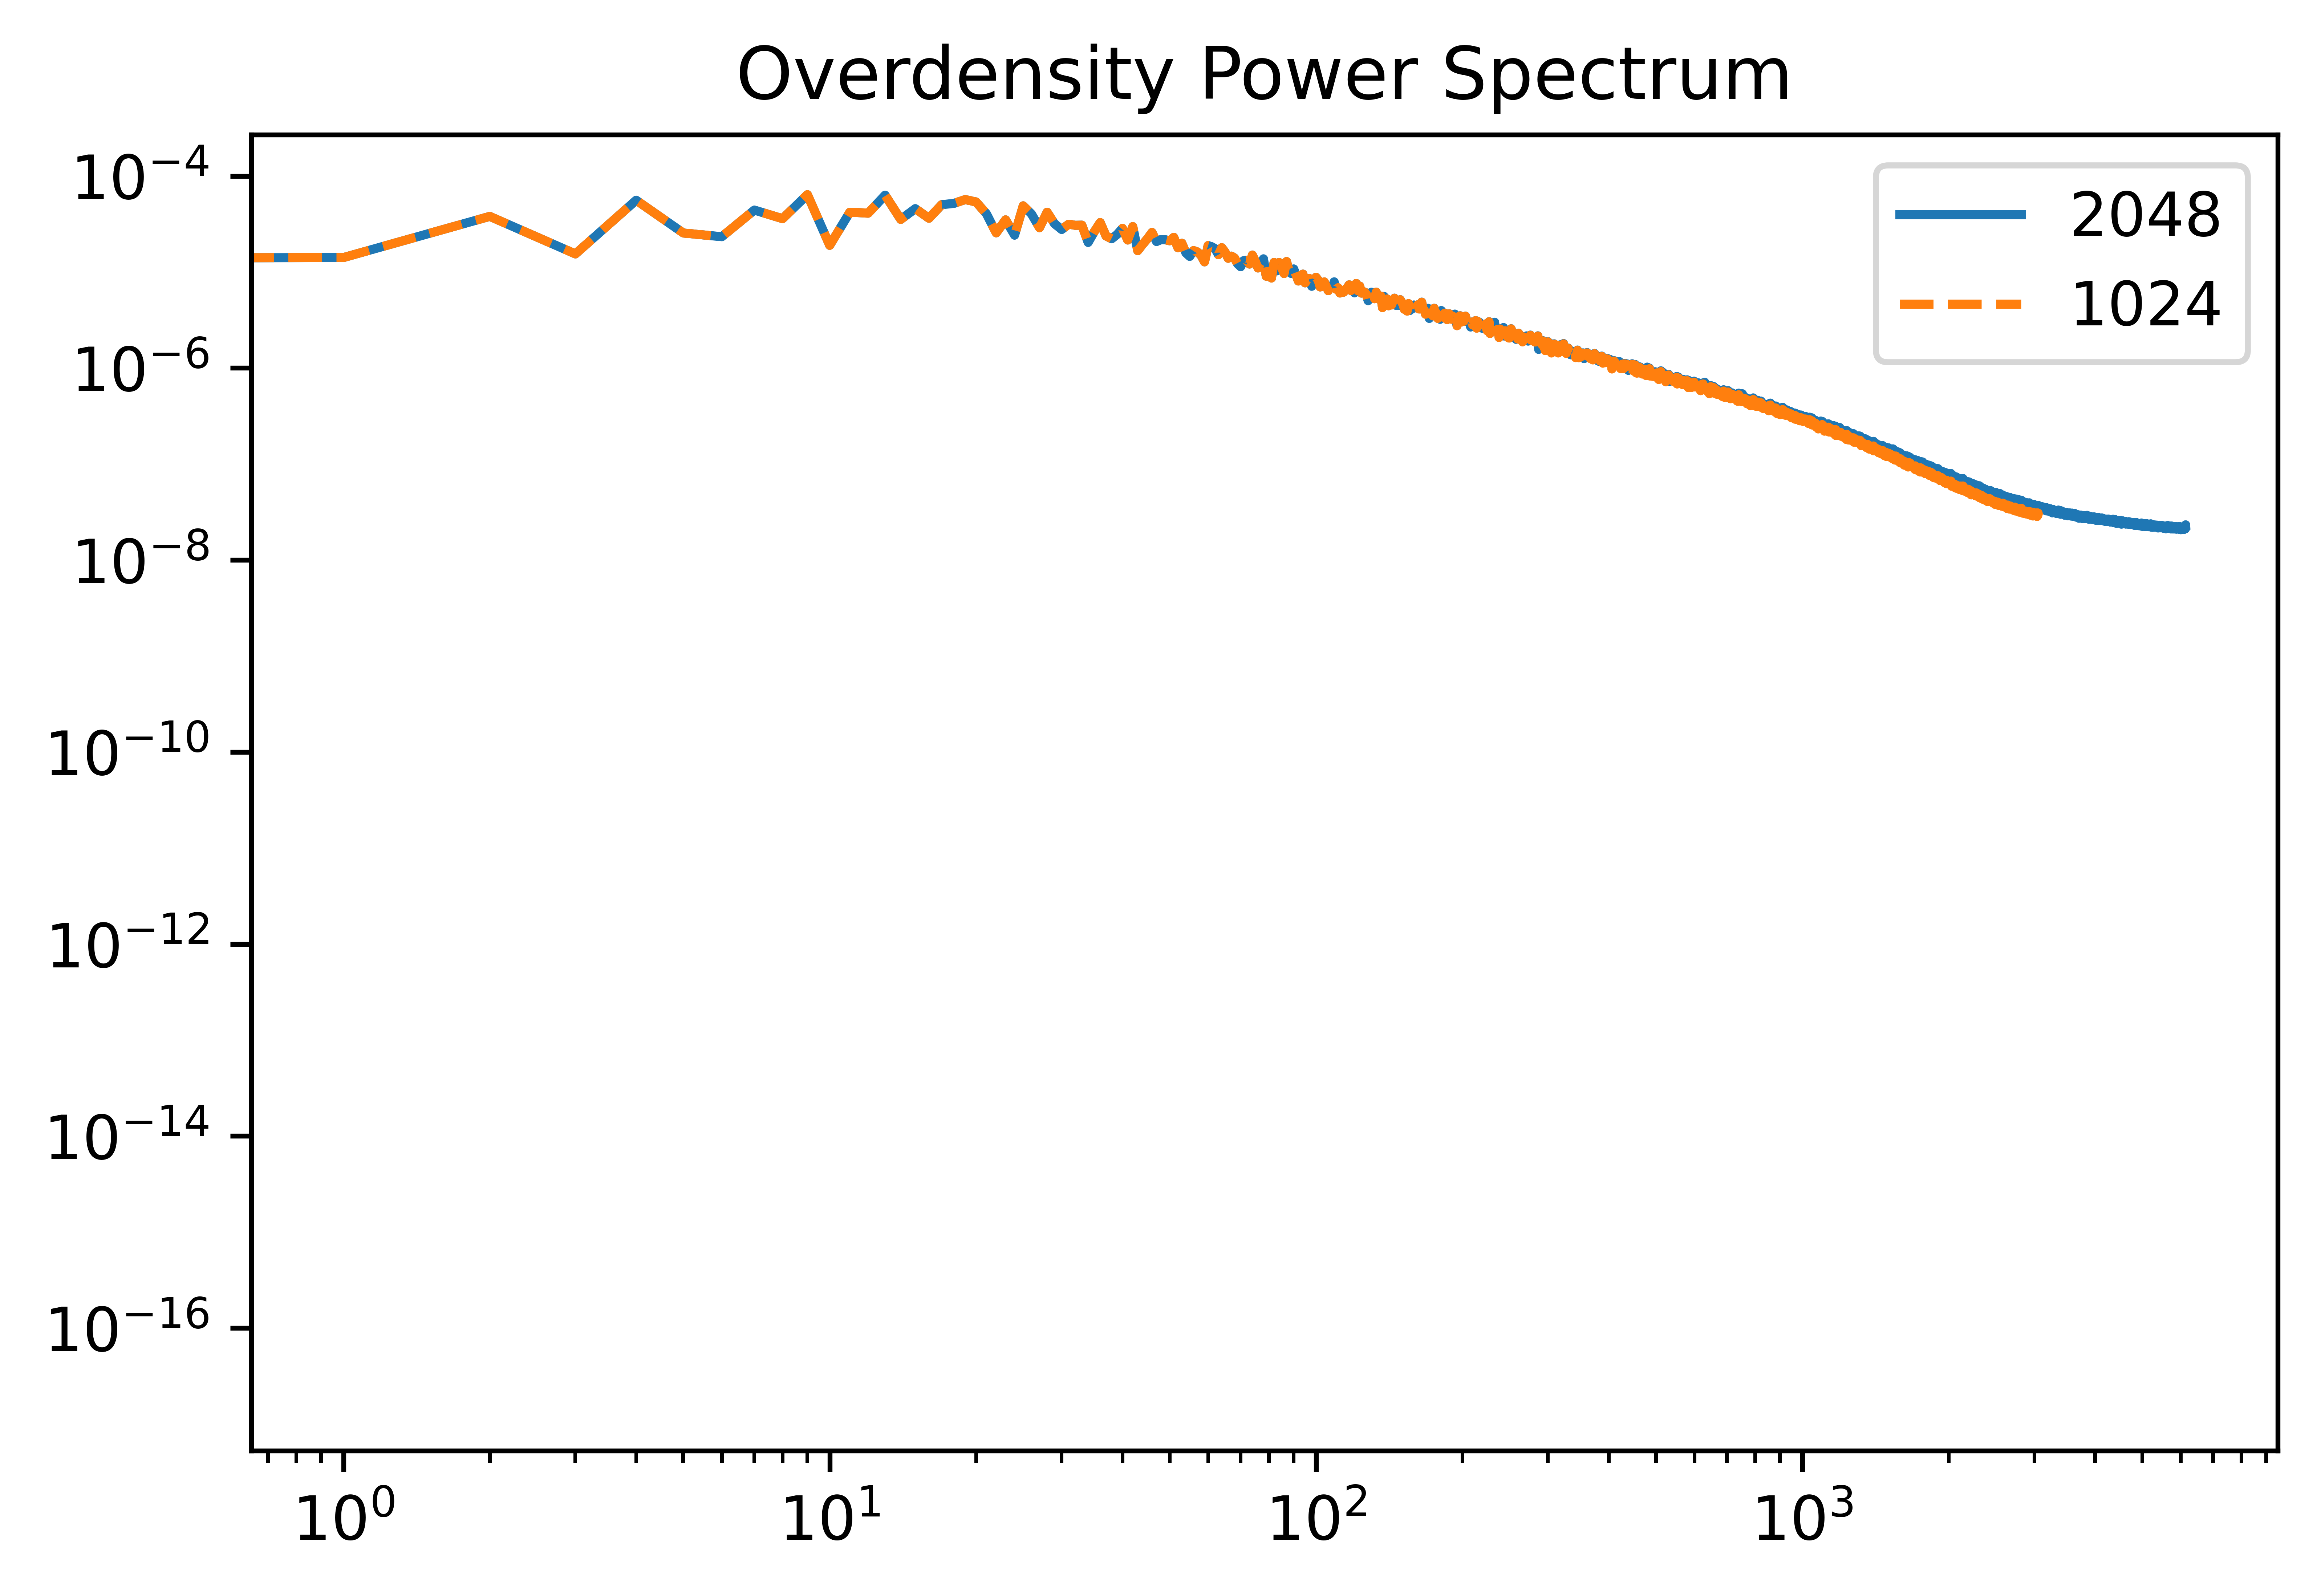

In [5]:
plt.figure(dpi=1200)
plt.loglog(psOver2048);
plt.loglog(psOver1024,'--');
plt.legend(loc=0, labels=["2048","1024"])
plt.title("Overdensity Power Spectrum")
plt.show()

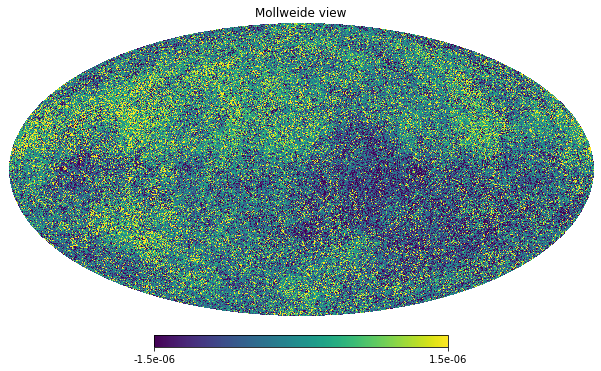

In [6]:
kSZ2048 = hp.read_map("MAPS/kSZ_NS_2048_R_1024_P_1024_DV_1.fits")
kSZ1024 = hp.read_map("MAPS/kSZ_NS_1024_R_1024_P_1024_DV_1.fits")
hp.mollview(kSZ2048,xsize=6400, min=-1.5*10**-6,max=1.5*10**-6)

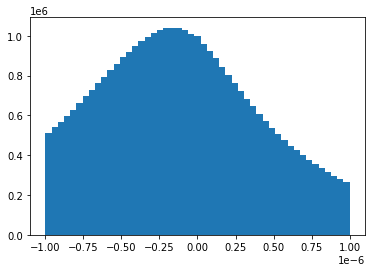

In [7]:
plt.hist(kSZ2048,bins = np.linspace(-1*10**-6,1*10**-6));

In [8]:
pskSZ2048 = hp.sphtfunc.anafast(kSZ2048)
pskSZ1024 = hp.sphtfunc.anafast(kSZ1024)

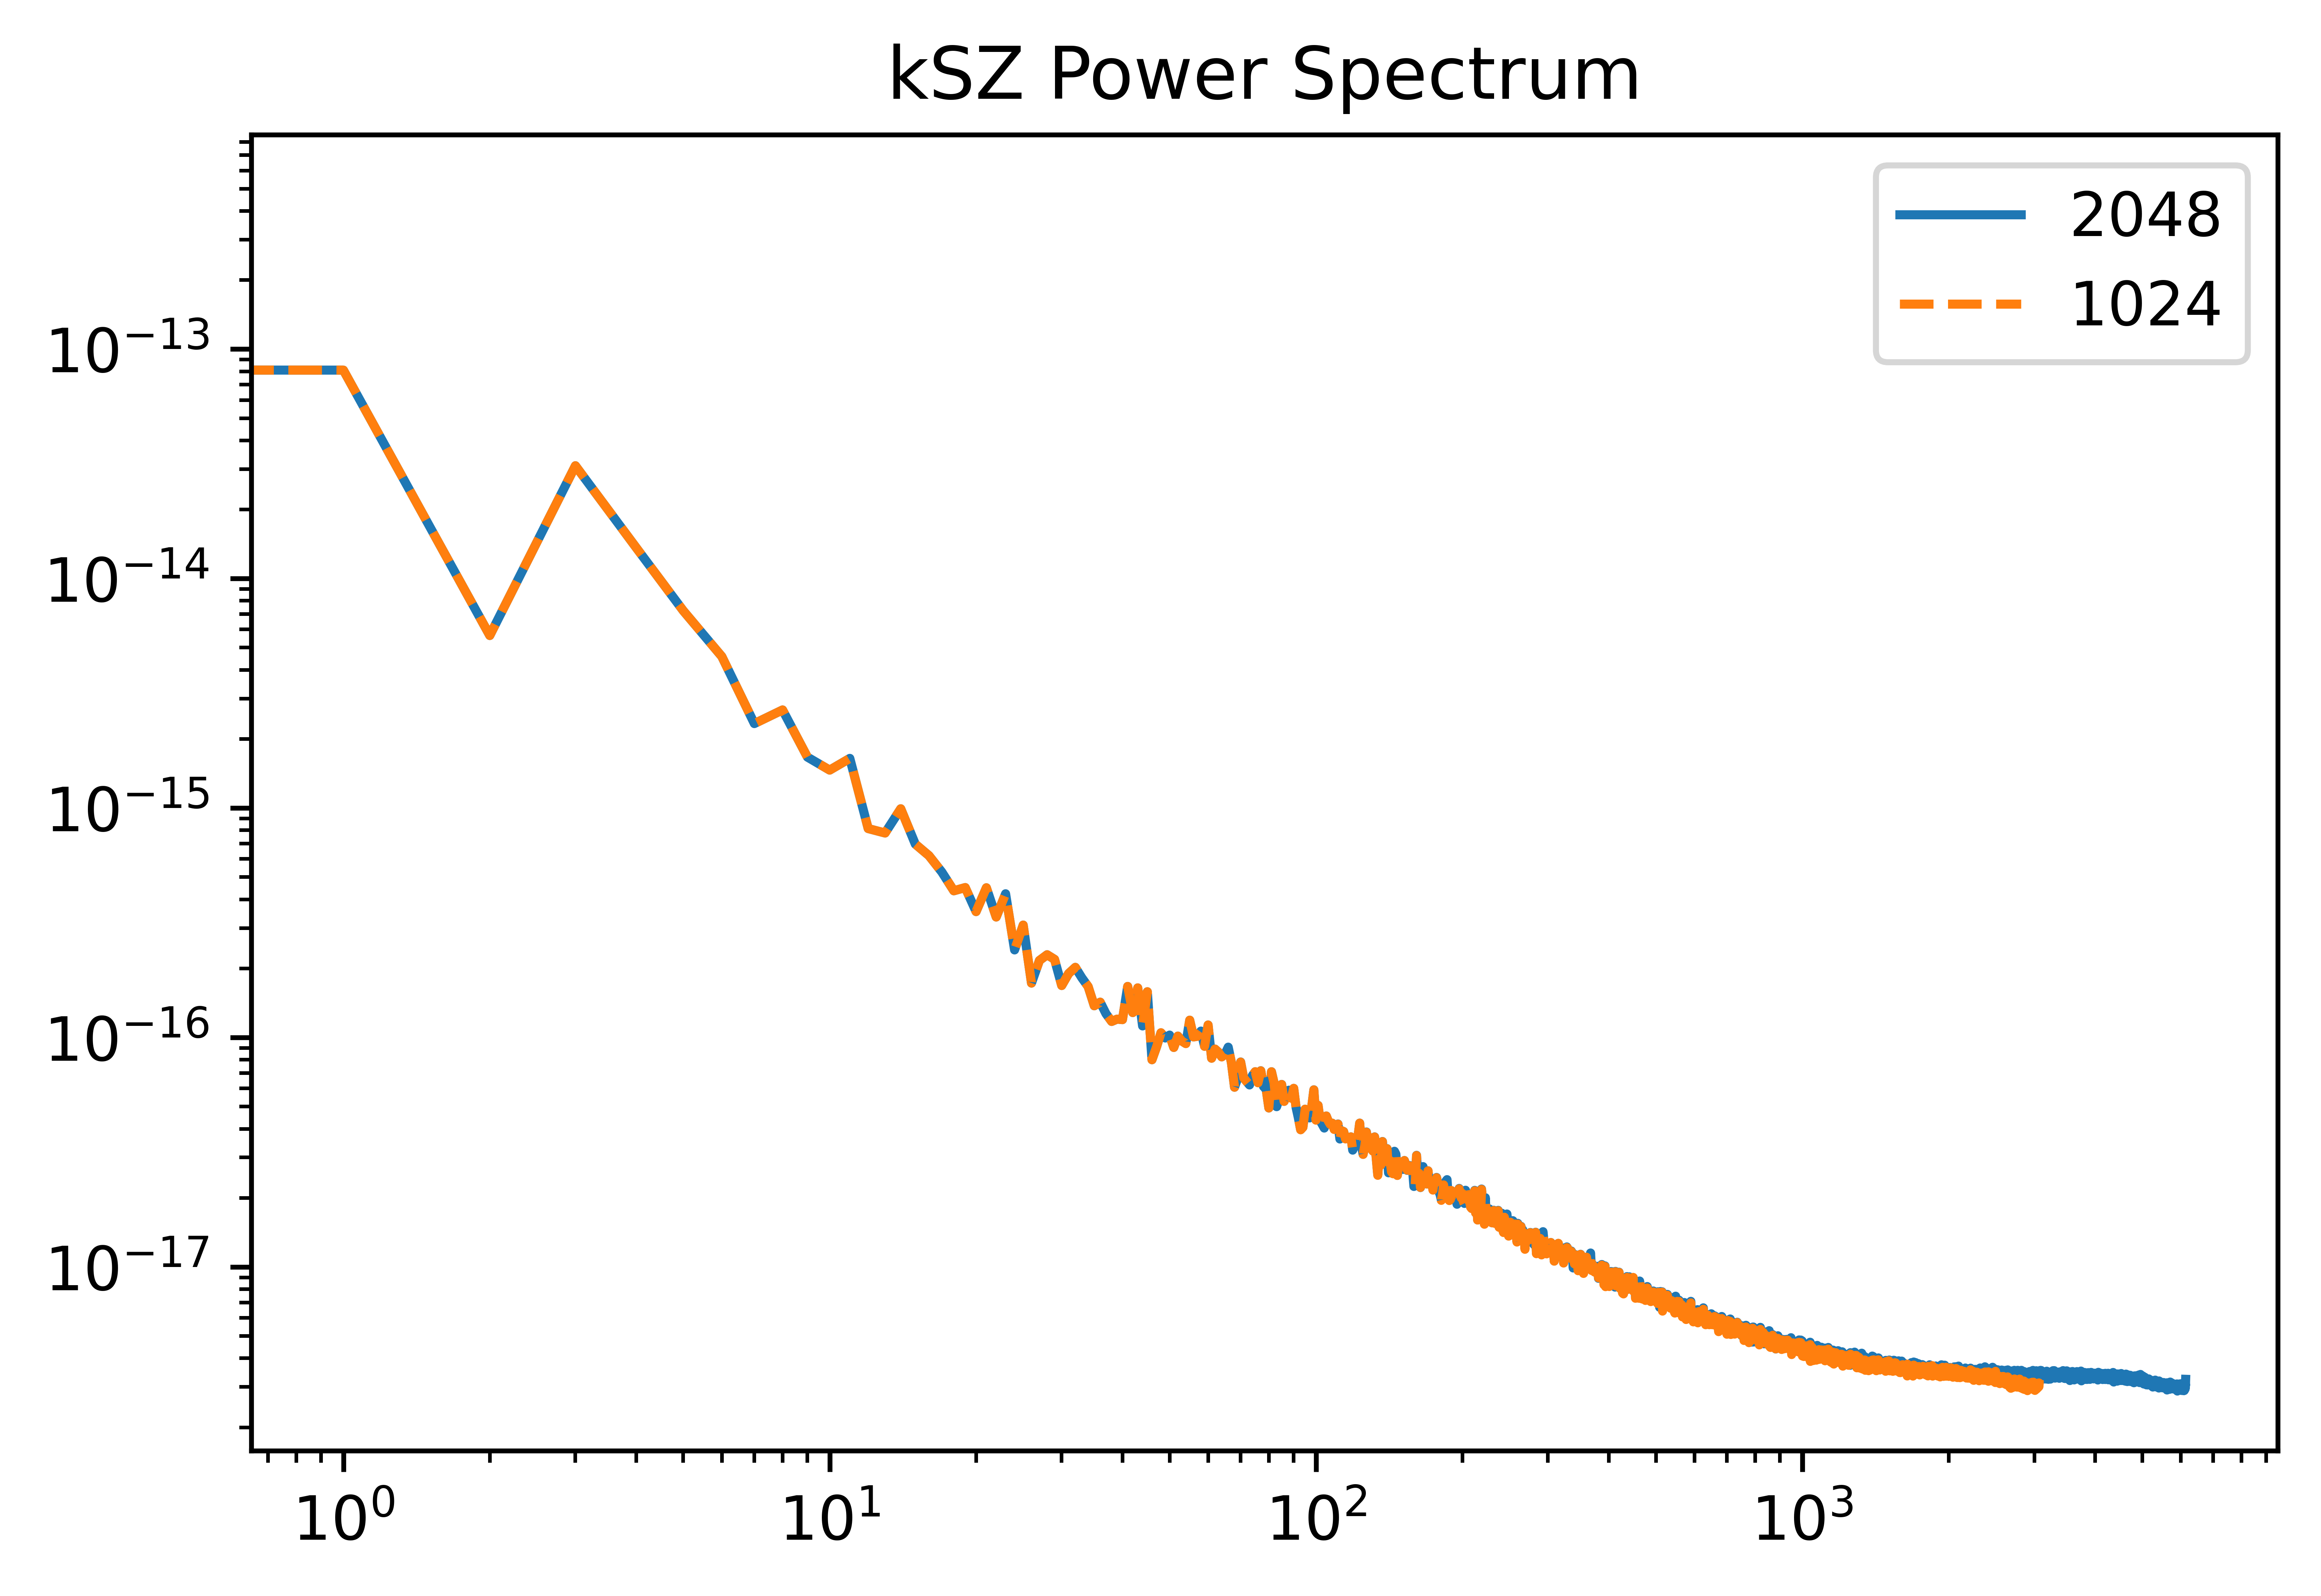

In [9]:
plt.figure(dpi=1200)
plt.loglog(pskSZ2048);
plt.loglog(pskSZ1024, '--');
plt.legend(loc=0, labels=["2048","1024"])
plt.title("kSZ Power Spectrum")
plt.show()

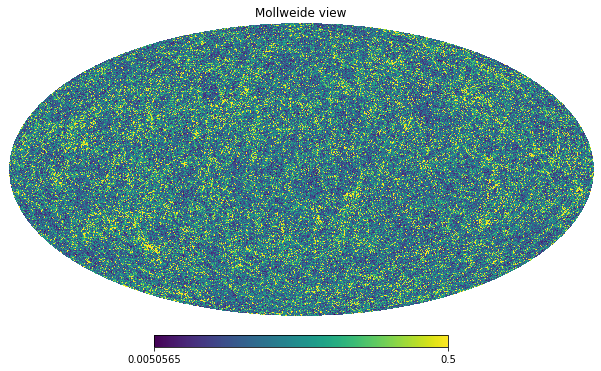

In [10]:
convergenceDV8 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1024_DV_8.fits")
convergenceDV16 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1024_DV_16.fits")
convergenceDV32 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1024_DV_32.fits")
convergenceDV64 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1024_DV_64.fits")
convergenceDV128 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1024_DV_128.fits")
hp.mollview(convergenceDV128,xsize=3200,max=.5)

In [13]:
psKDV8 = hp.sphtfunc.anafast(convergenceDV8)
psKDV16 = hp.sphtfunc.anafast(convergenceDV16)
psKDV32 = hp.sphtfunc.anafast(convergenceDV32)
psKDV64 = hp.sphtfunc.anafast(convergenceDV64)
psKDV128 = hp.sphtfunc.anafast(convergenceDV64)

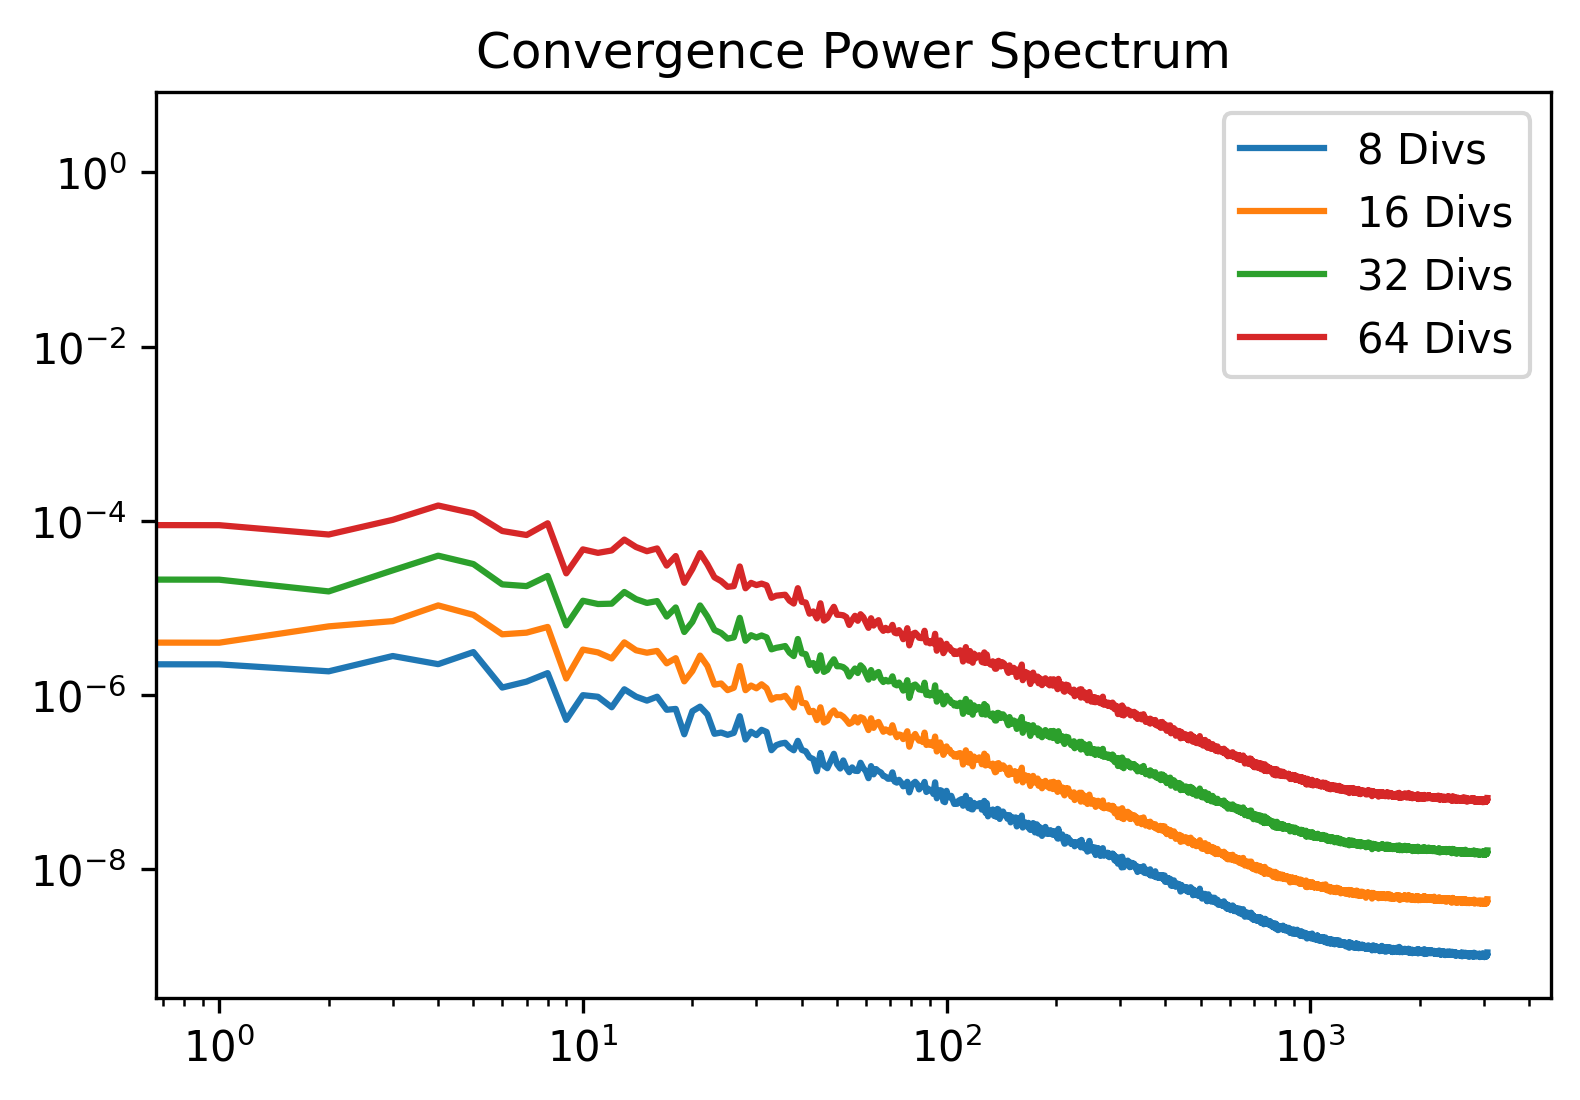

In [14]:
plt.figure(dpi=300)
plt.loglog(psKDV8);
plt.loglog(psKDV16);
plt.loglog(psKDV32);
plt.loglog(psKDV64);
plt.loglog(psKDV128);
plt.legend(loc=0, labels=["8 Divs","16 Divs","32 Divs","64 Divs"])
plt.title("Convergence Power Spectrum")
plt.show()